# Exploring benchmark explanations on V2

## Fetch results

In [25]:
import os
import warnings

import json
from jsoncomment import JsonComment

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.metrics import fbeta_score, precision_score, recall_score

from git_root import git_root

import get_benchmark as bench

In [26]:
seed = 11
R = np.random.RandomState(seed=seed)

In [27]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    results, explanations = bench.fetch_new_detector_outputs()
all_results = bench.get_all_new_results(results)

{1, 0x3900000, 0x3904000, 0x1b4000
{1, 0x3a00000, 0x3a04000, 0x1d8000
{0
{0
{1, 0x3800000, 0x3804000, 0x1d0000
{1, 0x3700000, 0x3700400, 0x1ae400
{1, 0x3600000, 0x3600400, 0x1ae000
{1, 0x3900000, 0x3904000, 0x1b4000
{1, 0x3a00000, 0x3a04000, 0x1d8000
{0
{0
{1, 0x3800000, 0x3804000, 0x1d0000
{1, 0x3700000, 0x3700400, 0x1ae400
{1, 0x3600000, 0x3600400, 0x1ae000


In [38]:
bench.print_score(all_results)

The benchmark F2 score is 0.997
The benchmark precision is 0.988
The benchmark recall is 0.999


## See a couple misclassified files

In [28]:
misclassified = all_results[all_results["label"] != all_results["prediction"]]
data = pd.read_json(git_root("data", "full_data.json"))

In [29]:
n_misclassified = misclassified.shape[0]
print(f"There are {n_misclassified} misclassified files")

There are 52 misclassified files


In [30]:
misclassified = misclassified.merge(
    data.drop(columns=["label"]), 
    on=["file_name"], 
    how="left"
)

In [31]:
false_positives = misclassified[misclassified["label"] == 0]
false_negatives = misclassified[misclassified["label"] == 1]
n_fp = false_positives.shape[0]
n_fn = false_negatives.shape[0]
print(f"There are {n_fp} false positives")
print(f"There are {n_fn} false negatives")

There are 64 false positives
There are 4 false negatives


In [32]:
n_rand = 10
rand_fp_id = R.randint(0, n_fp, n_rand)
rand_fn_id = R.randint(0, n_fn, n_rand)

In [33]:
rand_fp = false_positives.iloc[rand_fp_id, ].\
    reset_index(drop=True)
rand_fn = false_negatives.iloc[rand_fn_id, ].\
    reset_index(drop=True)

In [34]:
def print_file_content(df, n_rand=3, ask_user=False):
    for idx in range(n_rand):
        print(f"\nFILE NAME: {df['file_name'][idx]}")
        print("-----------------------------------------------")
        print(f"DATA SOURCE: {df['data_source'][idx]}")
        print("-----------------------------------------------")
        print(df["content"][idx])
        if ask_user:
            if idx < n_rand - 1:
                keep_going = input("Keep viewing files? (Y/N)")
                if keep_going != "Y":
                    break

In [35]:
print_file_content(rand_fp, n_rand, ask_user=True)


FILE NAME: announces.c
-----------------------------------------------
DATA SOURCE: None
-----------------------------------------------

#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <limits.h>

#include "log.h"
#include "conf.h"
#include "utils.h"
#include "net.h"
#include "kad.h"
#ifdef BOB
#include "ext-bob.h"
#endif
#ifdef TLS
#include "ext-tls-client.h"
#endif
#include "announces.h"


// Announce values every 20 minutes
#define ANNOUNCES_INTERVAL (20*60)


static time_t g_announces_expire = 0;
static time_t g_announces_announce = 0;
static struct value_t *g_values = NULL;


struct value_t* announces_get(void)
{
	return g_values;
}

struct value_t* announces_find(const uint8_t id[])
{
	struct value_t *value;

	value = g_values;
	while (value) {
		if (id_equal(id, value->id)) {
			return value;
		}
		value = value->next;
	}
	return NULL;
}

void announces_debug(FILE *fp)
{
	struct value_t *value;
	time_t now;
	int value_counter;

	now = time_now_sec();
	value

Keep viewing files? (Y/N) Y



FILE NAME: libnet_prand.c
-----------------------------------------------
DATA SOURCE: None
-----------------------------------------------
/*
 *  libnet
 *  libnet_prand.c - pseudo-random number generation
 *
 *  Copyright (c) 1998 - 2004 Mike D. Schiffman <mike@infonexus.com>
 *  All rights reserved.
 *
 * Redistribution and use in source and binary forms, with or without
 * modification, are permitted provided that the following conditions
 * are met:
 * 1. Redistributions of source code must retain the above copyright
 *    notice, this list of conditions and the following disclaimer.
 * 2. Redistributions in binary form must reproduce the above copyright
 *    notice, this list of conditions and the following disclaimer in the
 *    documentation and/or other materials provided with the distribution.
 *
 * THIS SOFTWARE IS PROVIDED BY THE AUTHOR AND CONTRIBUTORS ``AS IS'' AND
 * ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
 * IMPLIED WARRANTIES OF MERCHAN

Keep viewing files? (Y/N) Y



FILE NAME: sha512.c
-----------------------------------------------
DATA SOURCE: github
-----------------------------------------------
/* dummy file for autoconf */



Keep viewing files? (Y/N) Y



FILE NAME: kdf_compat.c
-----------------------------------------------
DATA SOURCE: None
-----------------------------------------------
/*
 * ISC License
 *
 * Copyright (c) 2013-2018
 * Frank Denis <j at pureftpd dot org>
 *
 * Permission to use, copy, modify, and/or distribute this software for any
 * purpose with or without fee is hereby granted, provided that the above
 * copyright notice and this permission notice appear in all copies.
 *
 * THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES
 * WITH REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF
 * MERCHANTABILITY AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR
 * ANY SPECIAL, DIRECT, INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES
 * WHATSOEVER RESULTING FROM LOSS OF USE, DATA OR PROFITS, WHETHER IN AN
 * ACTION OF CONTRACT, NEGLIGENCE OR OTHER TORTIOUS ACTION, ARISING OUT OF
 * OR IN CONNECTION WITH THE USE OR PERFORMANCE OF THIS SOFTWARE.
 */

/************************************

Keep viewing files? (Y/N) Y



FILE NAME: sha512.c
-----------------------------------------------
DATA SOURCE: github
-----------------------------------------------
/* sha512.c
 *
 * Copyright (C) 2006-2019 wolfSSL Inc.
 *
 * This file is part of wolfSSL.
 *
 * wolfSSL is free software; you can redistribute it and/or modify
 * it under the terms of the GNU General Public License as published by
 * the Free Software Foundation; either version 2 of the License, or
 * (at your option) any later version.
 *
 * wolfSSL is distributed in the hope that it will be useful,
 * but WITHOUT ANY WARRANTY; without even the implied warranty of
 * MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 * GNU General Public License for more details.
 *
 * You should have received a copy of the GNU General Public License
 * along with this program; if not, write to the Free Software
 * Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1335, USA
 */


#ifdef HAVE_CONFIG_H
    #include <config.h>
#endif

#in

Keep viewing files? (Y/N) N


In [36]:
print_file_content(rand_fn, n_rand, ask_user=True)


FILE NAME: IDEA.cpp
-----------------------------------------------
DATA SOURCE: github
-----------------------------------------------
#include<bits/stdc++.h>
using namespace std;

long long btoi(string s)
{
    long long ans=0;
    for(long long i = s.length() - 1 ; i >= 0 ; i--)
        ans+=(s[i]-'0') * pow(2, s.length()-i-1);
    return ans;
}

string itob(long long number)
{
    if ( number == 0 )
        return "0";
    if ( number == 1 )
        return "1";
    if ( number % 2 == 0 )
        return itob(number / 2) + "0";
    else
        return itob(number / 2) + "1";
}


string mul(string a, string b)
{
    string s = itob( btoi(a) * btoi(b));
    return s.substr(s.length()-17, 16);
}

string add(string a,string b)
{
    string s=itob(btoi(a) * btoi(b));
    return s.substr(s.length()-17, 16);
}

string xo(string a,string b)
{
    string s=itob(btoi(a) * btoi(b));
    return s.substr(s.length()-17, 6);
}

int main()
{
    string ip = "1010010100000101000101010110000000100001

Keep viewing files? (Y/N) Y



FILE NAME: diffie_hellma.cpp
-----------------------------------------------
DATA SOURCE: github
-----------------------------------------------
#include<stdio.h>
long long int power(int a,int b,int mod)
{
	 long long int t;
	 if(b==1)
	  	return a;
	 t=power(a,b/2,mod);
	 if(b%2==0)
	  	return (t*t)%mod;
	 else
	  	return (((t*t)%mod)*a)%mod;
}
long long int calculateKey(int a,int x,int n)
{
 	return power(a,x,n);
}
int main()
{
	 int n,g,x,a,y,b;
	 printf("Enter the value of n and g : ");
	 scanf("%d%d",&n,&g);
	 printf("Enter the value of x for the first person : ");
	 scanf("%d",&x);
	 a=power(g,x,n);
	 printf("Enter the value of y for the second person : ");
	 scanf("%d",&y);
	 b=power(g,y,n);
	 printf("key for the first person is : %lld\n",power(b,x,n));
	 printf("key for the second person is : %lld\n",power(a,y,n));
	 return 0;
}
//23 5 6 15



Keep viewing files? (Y/N) Y



FILE NAME: Difie_MITM.cpp
-----------------------------------------------
DATA SOURCE: github
-----------------------------------------------
#include<stdio.h>
long long int power(int a,int b,int mod)
{
    long long int t;
    if(b==1)
        return a;
    t=power(a,b/2,mod);
    if(b%2==0)
        return (t*t)%mod;
    else
        return (((t*t)%mod)*a)%mod;
}
long long int calculateKey(int a,int x,int n)
{
    return power(a,x,n);
}
int main()
{
    int n,g,x,a,y,b,t;
    printf("Enter the value of n and g : ");
    scanf("%d%d",&n,&g);
    printf("Enter the value of x for the first person : ");
    scanf("%d",&x);
    printf("Enter the value of y for the second person : ");
    scanf("%d",&y);
    printf("Enter the value of t for the middle person : ");
    scanf("%d",&t);
    a=power(g,t*x,n);
    b=power(g,t*y,n);
    printf("key for the first person is : %lld\n",power(b,t*x,n));
    printf("key for the second person is : %lld\n",power(a,t*y,n));
    return 0;
}



Keep viewing files? (Y/N) Y



FILE NAME: diffie_hellma.cpp
-----------------------------------------------
DATA SOURCE: github
-----------------------------------------------
#include<stdio.h>
long long int power(int a,int b,int mod)
{
	 long long int t;
	 if(b==1)
	  	return a;
	 t=power(a,b/2,mod);
	 if(b%2==0)
	  	return (t*t)%mod;
	 else
	  	return (((t*t)%mod)*a)%mod;
}
long long int calculateKey(int a,int x,int n)
{
 	return power(a,x,n);
}
int main()
{
	 int n,g,x,a,y,b;
	 printf("Enter the value of n and g : ");
	 scanf("%d%d",&n,&g);
	 printf("Enter the value of x for the first person : ");
	 scanf("%d",&x);
	 a=power(g,x,n);
	 printf("Enter the value of y for the second person : ");
	 scanf("%d",&y);
	 b=power(g,y,n);
	 printf("key for the first person is : %lld\n",power(b,x,n));
	 printf("key for the second person is : %lld\n",power(a,y,n));
	 return 0;
}
//23 5 6 15



Keep viewing files? (Y/N) N


### Comments:

- false positives include matches on terms like `SHA` that are sometimes used in non-crypto contexts
- false positives include code that does not implement cryptography but sets up the field for some cryptographic operations
- false positives include a couple of mislabeled examples (such as implementation of `SHA`, a set of cryptographic hash functions designed by the NSA)
- false negatives include a manual crypto function that use very basic operations and really would not be considered crypto if it weren't for some keywords to be honest

## Understand why files were classified as `crypto`

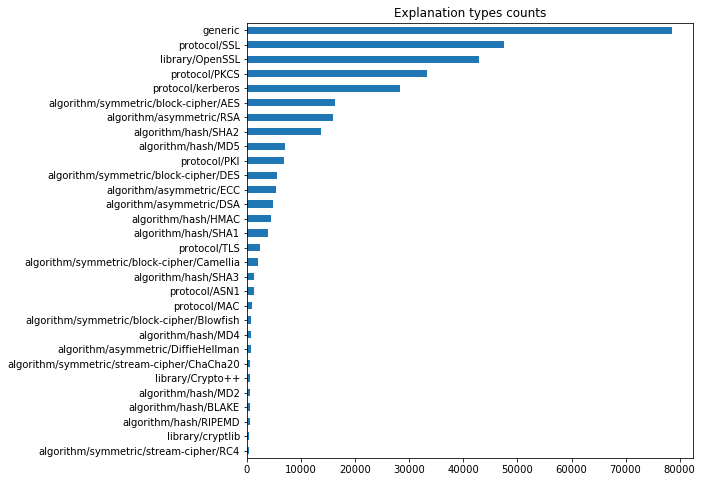

In [13]:
plt.figure(figsize=(8, 8))
plt.title("Explanation types counts")
explanations["reason_for_prediction"].value_counts().sort_values().\
    tail(30).plot(kind="barh")

In [14]:
def print_matched_text_for(reason):
    reason_explanations = explanations[
        explanations["reason_for_prediction"] == reason
    ]
    matches = reason_explanations["matched_text"].str.lower().unique()
    print(
        "Matched text for the '{}' explanations is: \n \t{}".format(
            reason, ', \n \t'.join(matches)
        )
    )

In [15]:
print_matched_text_for("generic")

Matched text for the 'generic' explanations is: 
 	crypt, 
 	secretkey, 
 	cipher, 
 	secret_key, 
 	certs, 
 	blockcipher, 
 	block cipher, 
 	stream cipher, 
 	_cipher, 
 	key_schedule, 
 	mersenne, 
 	krypt


In [16]:
print_matched_text_for("protocol/TLS")

Matched text for the 'protocol/TLS' explanations is: 
 	tlsv1, 
 	tls_client, 
 	tls_client_method, 
 	tls_server, 
 	tls_server_method, 
 	ssl/tls, 
 	tls_method, 
 	transport layer security, 
 	mbedtls, 
 	dtls_get_data_mtu, 
 	dtls_method, 
 	tls_cipher, 
 	dtls_client_method, 
 	tlsv1_method, 
 	tlsv1_1_method, 
 	tlsv1_2_method, 
 	dtlsv1_2_method, 
 	dtlsv1_listen, 
 	dtls_server_method, 
 	dtlsv1_2_client_method, 
 	dtls_timer_cb, 
 	dtls_set_timer_cb, 
 	tlsv1_2_server_method, 
 	tlsv1_2_client_method, 
 	tlsv1_1_server_method, 
 	tlsv1_1_client_method, 
 	tlsv1_server_method, 
 	tlsv1_client_method, 
 	dtlsv1_2_server_method, 
 	dtlsv1_method, 
 	dtlsv1_server_method, 
 	dtlsv1_client_method, 
 	gnutls


In [18]:
#print_matched_text_for("protocol/PKCS")

In [20]:
#print_matched_text_for("library/OpenSSL")

In [21]:
print_matched_text_for("algorithm/hash/MD5")

Matched text for the 'algorithm/hash/MD5' explanations is: 
 	_md5, 
 	_md5_, 
 	md5, 
 	evp_md, 
 	md5_, 
 	md5init, 
 	md5update, 
 	md5final, 
 	0x5a827999, 
 	evp_md5, 
 	md5_init, 
 	0xd76aa478, 
 	0xe8c7b756, 
 	md5sum, 
 	md5_update, 
 	md5_final, 
 	mdstring, 
 	evp_md_null
